In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("../data/students.csv", encoding="utf-8")

df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
df['grade'] = pd.cut(df["Performance Index"], bins=[0,59,69,79,89,100], labels = ['f','d','c','b','a'])

df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,grade
0,7,99,Yes,9,1,91.0,a
1,4,82,No,4,2,65.0,d
2,8,51,Yes,7,2,45.0,f
3,5,52,Yes,5,2,36.0,f
4,7,75,No,8,5,66.0,d


In [4]:
X = df[["Hours Studied", "Sleep Hours", "Previous Scores"]]
y = df["grade"]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

X_train.head()

,Hours Studied,Sleep Hours,Previous Scores
9254,5,7,49
1561,2,7,48
1670,2,7,81
6087,2,6,46
6669,8,9,47


In [8]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns, index=X_test.index)

print(X_train_scaled.head())

      Hours Studied  Sleep Hours  Previous Scores
9254       0.006455     0.269888        -1.183844
1561      -1.149747     0.269888        -1.241506
1670      -1.149747     0.269888         0.661318
6087      -1.149747    -0.318906        -1.356828
6669       1.162658     1.447477        -1.299167


In [9]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [10]:
y_pred = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)

print(metrics.accuracy_score(y_train, y_pred_train),
      metrics.f1_score(y_test, y_pred, average='macro'))


print(metrics.accuracy_score(y_test, y_pred),
      metrics.f1_score(y_test, y_pred, average='macro'))

0.913125 0.8622334224602222
0.922 0.8622334224602222


In [11]:
model = SVC(kernel = 'rbf', C=1, gamma=1)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)

print(metrics.accuracy_score(y_train, y_pred_train),
      metrics.f1_score(y_test, y_pred, average='macro'))


print(metrics.accuracy_score(y_test, y_pred),
      metrics.f1_score(y_test, y_pred, average='macro'))

0.917125 0.8523533508208512
0.917 0.8523533508208512


In [12]:
folds = KFold(n_splits=5, shuffle=True, random_state=7)
model = SVC()

In [13]:
params = {'C': [0.1, 1, 10, 100, 1000, 2000],
          'gamma': [1, 0.1, 0.01]}

c_opt = GridSearchCV(estimator=model, param_grid=params,
                     scoring='f1_macro', cv=folds, n_jobs=-1,
                     verbose=1, return_train_score=True)

c_opt.fit(X_train_scaled, y_train)
c_results = pd.DataFrame(c_opt.cv_results_)
c_results

Fitting 5 folds for each of 9 candidates, totalling 45 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.017811,0.178628,2.732135,0.271541,0.1,1,"{'C': 0.1, 'gamma': 1}",0.771010,0.797626,0.812875,...,0.802222,0.021414,6,0.807076,0.805670,0.797883,0.830777,0.812910,0.810863,0.011050
1,3.578985,0.209490,3.306751,0.377201,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.670584,0.660605,0.664160,...,0.668337,0.005112,8,0.671764,0.678623,0.668444,0.666348,0.669383,0.670912,0.004230
2,6.376306,0.349376,3.550713,0.240172,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.343158,0.355788,0.253650,...,0.305823,0.038061,9,0.322035,0.385872,0.250698,0.284416,0.291033,0.306811,0.045567
3,1.489615,0.102392,1.725128,0.039676,1,1,"{'C': 1, 'gamma': 1}",0.844193,0.838314,0.856475,...,0.848847,0.009653,4,0.866414,0.871117,0.860916,0.868218,0.858958,0.865125,0.004536
4,1.520617,0.168721,2.089866,0.297374,1,0.1,"{'C': 1, 'gamma': 0.1}",0.841424,0.833468,0.853843,...,0.846477,0.009090,5,0.854000,0.862172,0.853831,0.858095,0.848743,0.855368,0.004514
5,2.485708,0.131540,2.690824,0.108677,1,0.01,"{'C': 1, 'gamma': 0.01}",0.667883,0.663882,0.675983,...,0.673499,0.007510,7,0.675573,0.681829,0.675645,0.673235,0.674799,0.676216,0.002937
6,1.217223,0.056915,1.221324,0.025670,10,1,"{'C': 10, 'gamma': 1}",0.842277,0.836744,0.866489,...,0.853088,0.013048,2,0.878364,0.874954,0.868556,0.871883,0.872639,0.873279,0.003266
7,1.024391,0.131479,1.158996,0.041561,10,0.1,"{'C': 10, 'gamma': 0.1}",0.847711,0.841724,0.863410,...,0.854954,0.009414,1,0.866217,0.867351,0.863144,0.863331,0.862916,0.864592,0.001830
8,1.256694,0.090737,1.205468,0.054140,10,0.01,"{'C': 10, 'gamma': 0.01}",0.845570,0.835122,0.862732,...,0.850813,0.009929,3,0.858898,0.860659,0.851731,0.856866,0.852137,0.856058,0.003577


In [14]:
model_scaled = SVC(gamma=0.1, C=10)
model_scaled.fit(X_train_scaled, y_train)
y_pred_train = model_scaled.predict(X_train_scaled)
y_pred = model_scaled.predict(X_test_scaled)


print(metrics.accuracy_score(y_train, y_pred_train),
      metrics.f1_score(y_train, y_pred_train, average='macro'))


print(metrics.accuracy_score(y_test, y_pred),
      metrics.f1_score(y_test, y_pred, average='macro'))

0.915125 0.8627311563406594
0.917 0.8483806991636367


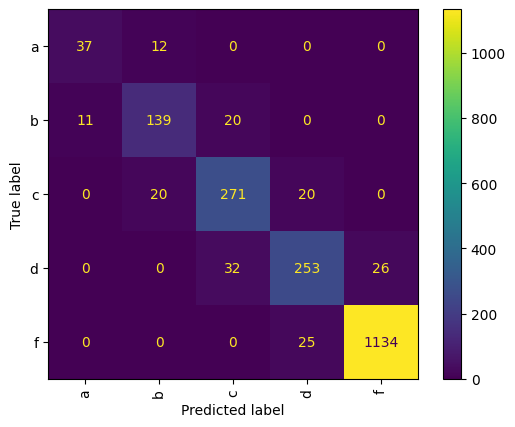

In [15]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test,
                                                y_pred,
                                                xticks_rotation='vertical')
plt.show()

In [16]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           a       0.77      0.76      0.76        49
           b       0.81      0.82      0.82       170
           c       0.84      0.87      0.85       311
           d       0.85      0.81      0.83       311
           f       0.98      0.98      0.98      1159

    accuracy                           0.92      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.92      0.92      0.92      2000



In [18]:
le = LabelEncoder()
y_factorized_train = le.fit_transform(y_train)
y_factorized_train
y_factorized_test = le.transform(y_test)

In [33]:
model = SVC(gamma=0.01, C=100)
to_fit = ['Previous Scores', 'Hours Studied']
X_train_scaled_sub = X_train_scaled.loc[:,to_fit].copy()
X_test_scaled_sub = X_test_scaled.loc[:,to_fit].copy()
model.fit(X_train_scaled_sub, y_factorized_train)

y_pred_train = model.predict(X_train_scaled_sub)
y_pred = model.predict(X_test_scaled_sub)

print(metrics.accuracy_score(y_factorized_train, y_pred_train),
      metrics.f1_score(y_factorized_train, y_pred_train, average='macro'))


print(metrics.accuracy_score(y_factorized_test, y_pred),
      metrics.f1_score(y_factorized_test, y_pred, average='macro'))

0.91025 0.8531003595073094
0.908 0.8412808417230526


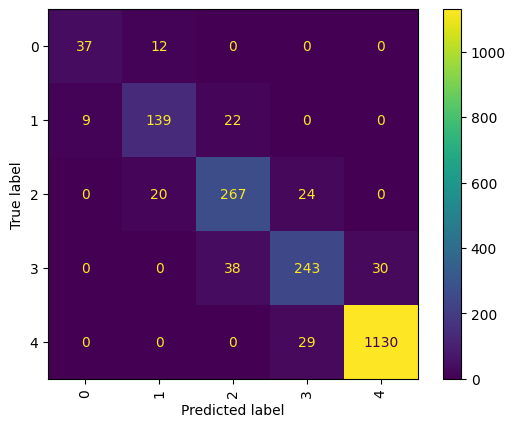

In [34]:
metrics.ConfusionMatrixDisplay.from_predictions(y_factorized_test,
                                                y_pred,
                                                xticks_rotation='vertical')
plt.show()

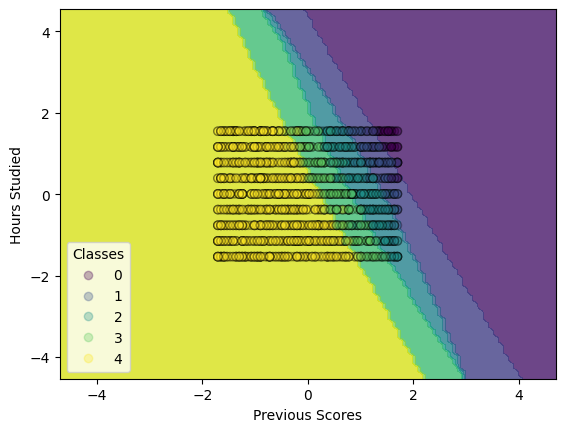

In [35]:
combined_test = pd.concat([X_test_scaled, y_test], axis=1)
combined_test['y_test_factor'] = y_factorized_test

disp = DecisionBoundaryDisplay.from_estimator(
    model,
    X_test_scaled.loc[:, to_fit],
    plot_method='contourf',
    xlabel=to_fit[0],
    ylabel=to_fit[1],
    alpha=0.8,
    eps=3
)
scatter = disp.ax_.scatter(combined_test[to_fit[0]],
                 combined_test[to_fit[1]],
                 c=combined_test['y_test_factor'],
                 edgecolor="k",
                 alpha=0.3)

plt.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
plt.show()